In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [74]:
df = pd.read_csv("train_upd.csv")
df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


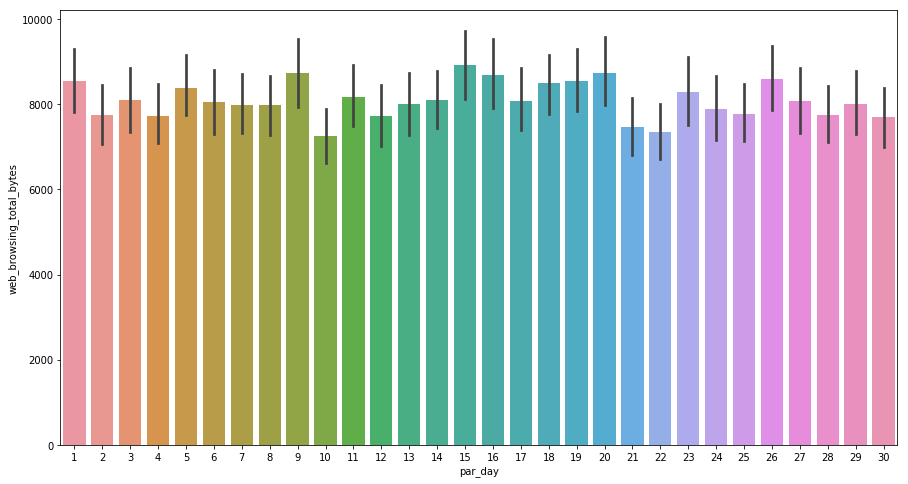

In [75]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)

sns.barplot(data = df, x="par_day", y="web_browsing_total_bytes")

In [76]:
df.loc[df['ran_vendor'] == 'ERICSSON']
print(df['Congestion_Type'].loc[df['ran_vendor'] == 'ERICSSON'].unique().sum())

4G_BACKHAUL_CONGESTION3G_BACKHAUL_CONGESTION4G_RAN_CONGESTIONNC


date = df[['par_year', 'par_month', 'par_day']]
date = date.rename(columns={"par_year":"year", "par_month":"month", "par_day":"day"})
dates = pd.to_datetime(date)
df = df.drop(['par_year', 'par_month', 'par_day'], axis=1)
date = pd.DataFrame({'date':dates})
DF = pd.concat([df, date],axis=1)
cols = DF.columns.tolist()
temp=cols[:2]+cols[-1:]+cols[2:-1]
DF=DF[temp]
DF.head()

**Label Encoding on Target Variable**

In [70]:
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb1 = LabelEncoder()
df['Congestion_Type'] = lb1.fit_transform(df['Congestion_Type'])
lb2 = LabelEncoder()
df['ran_vendor'] = lb2.fit_transform(df['ran_vendor'])
oh=OneHotEncoder()
oh=oh.fit_

In [71]:
df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,0,1
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,2,3
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,0,0
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,1,0
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,1,2


**Data Visualisation**

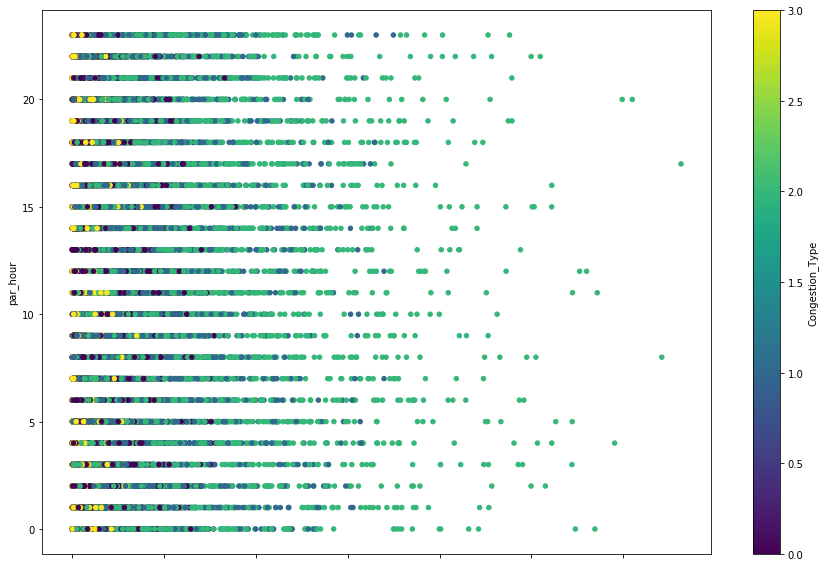

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
ax = df.plot.scatter(y='par_hour', x='subscriber_count', c='Congestion_Type', colormap='viridis')

**Feature Importance**

In [11]:
X = df.drop(['cell_name', 'Congestion_Type'],axis=1).values
y = df['Congestion_Type'].values

from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25)

In [12]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# load the iris datasets

# create a base classifier used to evaluate a subset of attributes
model = RandomForestClassifier()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[False False False False False False False False False False False False
  True  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False]
[33 35 34 27 28 29 19 24 22 21 20  8  1  1 23  3  5  1  6  2 16  4  7 25
 11  9 12 13 10 17 15 14 18 26 30 31 32]


In [13]:
df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,0,1
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,2,3
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,0,0
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,1,0
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,1,2


In [14]:
X1 = df[['health_total_bytes', 'software_dwnld_total_bytes', 'location_services_total_bytes']].values
#X1 = df[df[]]
y1 = df['Congestion_Type'].values

from sklearn.model_selection import train_test_split

X1_train,X1_val,y1_train,y1_val=train_test_split(X1,y1,test_size=0.25)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X1_train, y1_train)
y_pred = DT.predict(X1_val)
p = pd.DataFrame({
    'Actual':y1_val,
    'Predicted':y_pred
})
p.head()

,Actual,Predicted
0,2,2
1,0,1
2,2,2
3,1,0
4,1,3


In [16]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_pred)  

-0.002183143579437293

**Normalisation**

In [103]:
df['par_day'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                       23, 24, 25, 26, 27, 28, 29, 30, 31], [6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
                       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1], inplace=True)

df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,6,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,5,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,3,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,0,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,2,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


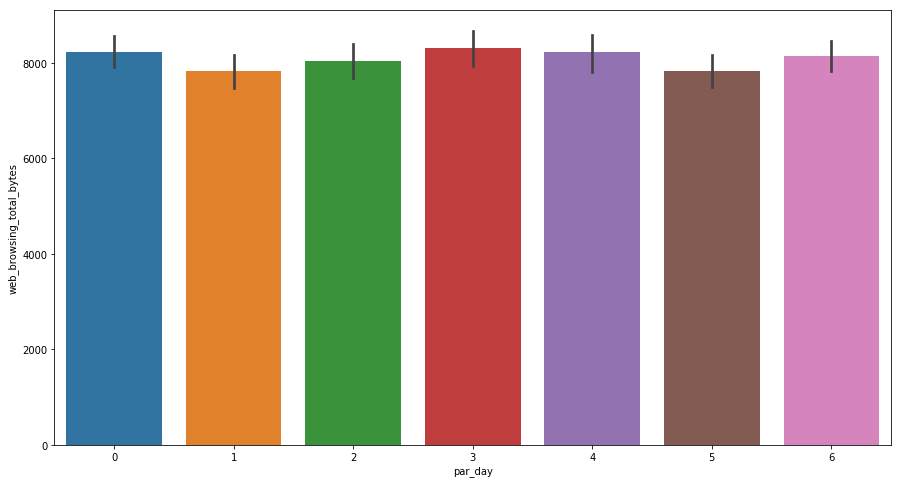

In [104]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 8)

sns.barplot(data = df, x="par_day", y="web_browsing_total_bytes")

In [105]:
df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,6,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,5,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,3,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,0,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,2,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [19]:
normalized_df=df.drop(['cell_name', 'Congestion_Type', 'par_year', 'par_month', 'par_min', '4G_rat'], axis=1)
normalized_df=(normalized_df-normalized_df.mean())/normalized_df.std()

In [20]:
normalized_df.head()

,par_day,par_hour,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,...,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor
0,1.442185,-1.660514,-0.388042,-0.406188,2.605931,-0.312483,0.322659,0.345839,2.802876,-0.034974,...,-0.513874,-0.517621,-0.323948,-0.209056,-0.268733,0.290281,-1.190116,0.882149,-1.347723,-1.224055
1,0.960254,1.223678,-0.478760,-0.324915,-0.408952,-0.196370,-0.450463,-0.364492,-0.494630,-0.518362,...,-0.530809,-0.415773,-0.434931,-0.540556,-0.514427,-0.425131,0.170554,1.467186,1.342244,1.225334
2,-0.003607,0.646840,-0.272329,-0.376311,-0.377558,0.789513,-0.364472,-0.457511,-0.563869,-0.170661,...,-0.403800,-0.483672,0.171209,-0.183556,0.646266,0.778855,-0.736559,0.882149,-0.451067,-1.224055
3,-1.449399,1.367888,-0.481537,0.025349,-0.400731,-0.020662,-0.448074,-0.102346,-0.451355,-0.492920,...,-0.573145,-0.517621,-0.067832,-0.243056,0.036267,-0.302987,0.283943,1.467186,-1.347723,0.000639
4,-0.485538,-0.795256,-0.420441,-0.313790,-0.371855,-0.057178,-0.315903,-0.110802,0.163141,-0.450518,...,-0.564678,-0.033841,-0.101981,0.173444,1.069877,2.148607,1.247751,-0.872960,1.342244,0.000639


In [21]:
Xn = normalized_df.values
yn = df['Congestion_Type'].values

from sklearn.model_selection import train_test_split

Xn_train, Xn_val, yn_train, yn_val = train_test_split(Xn,yn,test_size=0.25)

**MLP**

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
MLP = MLPClassifier(alpha=1, max_iter=500)
MLP.fit(Xn_train, yn_train)
yn_pred = MLP.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(yn_val, yn_pred))  
print()

0.7232689443405018



In [96]:
train_scores, valid_scores=validation_curve(MLPClassifier(validation_fraction=0), Xn, yn, "max_iter", [1, 10,100,500,1000])

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.

In [97]:
train_scores

array([[0.77567738, 0.77717952, 0.77315513],
       [0.79582212, 0.79720854, 0.7958568 ],
       [0.81524126, 0.81005843, 0.81452983],
       [0.8126635 , 0.81160499, 0.81680191],
       [0.8150885 , 0.81490816, 0.81412888]])

In [98]:
valid_scores

array([[0.77402726, 0.77361949, 0.77093756],
       [0.78471878, 0.78457955, 0.78644262],
       [0.77757837, 0.78160086, 0.77555853],
       [0.77712016, 0.77747651, 0.77521482],
       [0.77731108, 0.77495608, 0.7756731 ]])

In [88]:
valid_scores[:,0]

array([0.77467639, 0.77574554, 0.78124403, 0.78273321, 0.78868991,
       0.78857536])

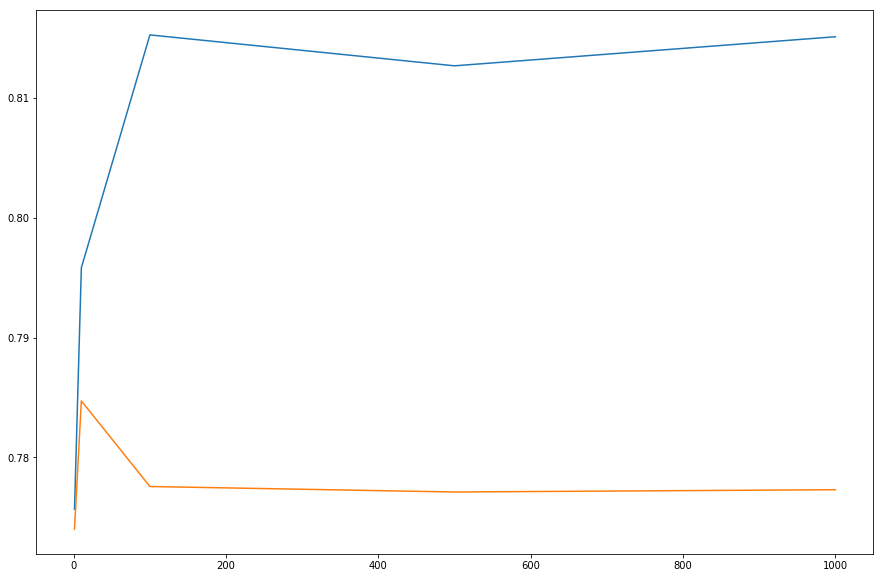

In [101]:
plt.plot([1, 10,100,500,1000],train_scores[:,0])
plt.plot([1, 10,100,500,1000],valid_scores[:,0])

yn_pred = MLP.predict(Xn_train)

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yn_train, yn_pred)  

In [24]:
MLP.set_params()

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

**XGBoost**

In [25]:
from xgboost import XGBClassifier
XG = XGBClassifier(n_estimators=500)
XG.fit(Xn_train, yn_train)
yn_pred = XG.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yn_val, yn_pred)
#train_scores, valid_scores=validation_curve(XG, Xn, yn, "n-estimators", [50,100,200,400,500])

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7334433667120935

yn_pred = XG.predict(Xn_train)
matthews_corrcoef(yn_train, yn_pred)

In [26]:
XG.set_params()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(Xn_train,yn_train)
y_pred=LR.predict(Xn_val)
print(matthews_corrcoef(yn_val, y_pred))
#train_scores, valid_scores=validation_curve(LR, Xn, yn, "C", [0.1, 0.5, 1, 2, 3])

0.7054767274950254


In [28]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier,RandomTreesEmbedding,IsolationForest,VotingClassifier
from sklearn.linear_model import LogisticRegression


GRA=GradientBoostingClassifier(n_estimators=500)
GRA.fit(Xn_train,yn_train)
pred_GRA=GRA.predict(Xn_val)
print(matthews_corrcoef(yn_val,pred_GRA))
#train_scores, valid_scores=validation_curve(GRA, Xn, yn, "n-estimators", [50, 100, 200, 400, 500])

0.7279277469490449


In [29]:
from sklearn.metrics import confusion_matrix
votingC=VotingClassifier([('GRA',GRA),('MLP',MLP),('LR',LR),('XG',XG)],voting='soft')
votingC.fit(Xn_train,yn_train)
pred=votingC.predict(Xn_val)
print(matthews_corrcoef(yn_val,pred))
confusion_matrix(yn_val,pred)

0.738120323673352


C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[3948,  361,    0,  624],
       [ 746, 3360,  789,    6],
       [  26,  960, 3936,    0],
       [ 349,    0,    0, 4535]], dtype=int64)

In [30]:
#from sklearn.model_selection import validation_curve
#validation_curve(MLP(), Xn, yn, "alpha", [1e-6,2])

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
ETF = ExtraTreesClassifier()
ETF.fit(Xn_train, yn_train)
y_pred = ETF.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(yn_val, y_pred))

0.5719758279939325


In [72]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(Xn_train, yn_train)
y_pred = DT.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(yn_val, y_pred))

0.40456413873613245


In [33]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500)
RF.fit(Xn_train, yn_train)
y_pred = RF.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(yn_val, y_pred))

0.6847647780963475


In [77]:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
AD.fit(Xn_train, yn_train)
y_pred = AD.predict(Xn_val)

from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(yn_val, y_pred))

0.6388831754638221


In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")